<a href="https://colab.research.google.com/github/Vishnu965283/Count-number-of-Object-using-Python-OpenCV/blob/main/XGBoost_Home_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
data=pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.600000e+03,9.600000e+03,9600.000000,9600.000000,9600.000000,9.600000e+03,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9598.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9599.000000,9599.000000
mean,4.556650e+09,5.337390e+05,3.361146,2.061745,2052.376667,1.610479e+04,1.430521,0.008125,0.240104,3.445208,7.593438,1748.307043,304.073438,1967.246458,91.921458,98078.050104,47.559870,-122.214788,1973.162621,13394.509428
std,2.863457e+09,3.801030e+05,0.914339,0.766914,912.743934,4.495113e+04,0.511424,0.089777,0.770697,0.665803,1.169649,811.538128,451.619012,27.999417,418.449395,53.989866,0.140153,0.139281,672.394603,26373.312028
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.117205e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.462275,-122.326000,1490.000000,5422.500000
50%,3.905030e+09,4.450000e+05,3.000000,2.000000,1890.000000,7.910000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.572800,-122.231000,1830.000000,7848.000000
75%,7.276350e+09,6.390000e+05,4.000000,2.500000,2500.000000,1.119425e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.127000,2340.000000,10382.000000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,438213.000000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

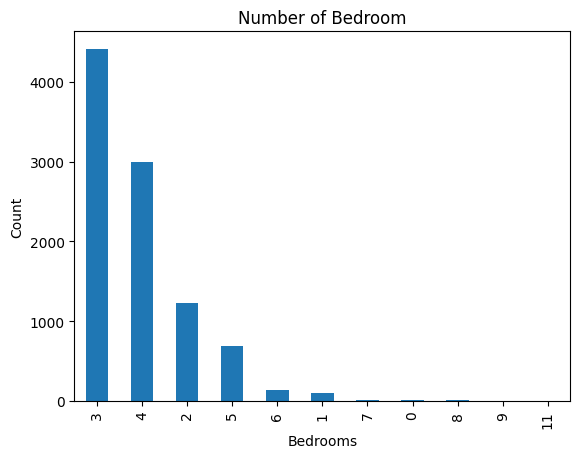

In [7]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title("Number of Bedroom")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
sns.despine

<Figure size 1000x1000 with 0 Axes>

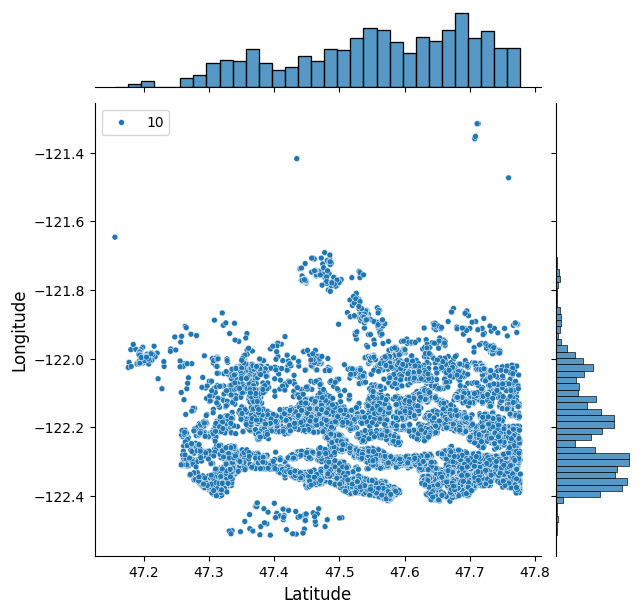

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [9]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values,y=data.long.values,size=10)
plt.ylabel("Longitude",fontsize=12)
plt.xlabel("Latitude",fontsize=12)
plt.show()
sns.despine

Text(0.5, 1.0, 'price vs Square Feet')

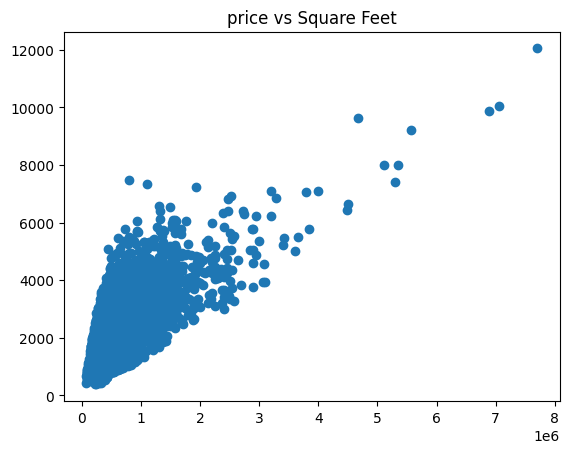

In [10]:
plt.scatter(data.price,data.sqft_living)
plt.title("price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location Of The Area')

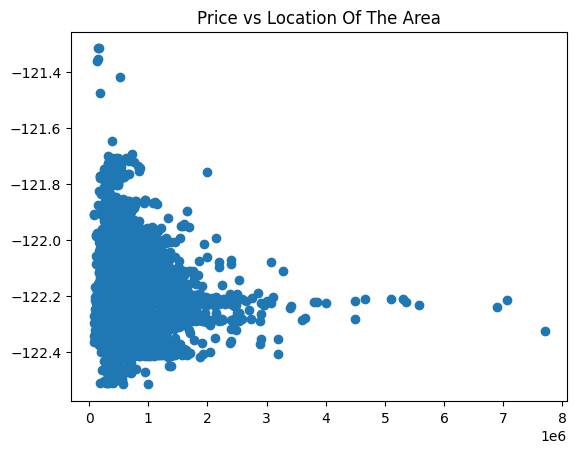

In [11]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location Of The Area")

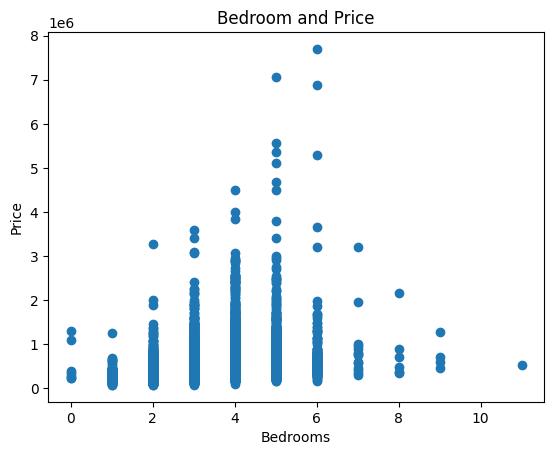

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [12]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

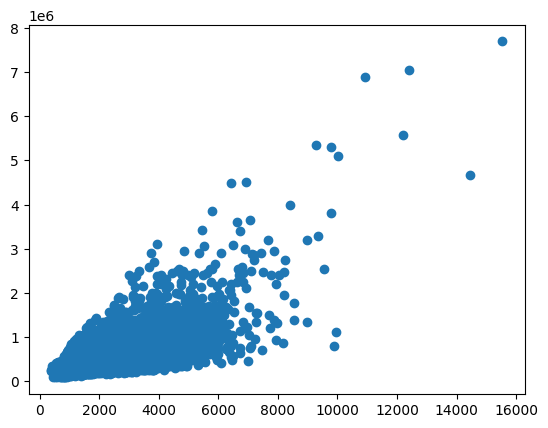

In [13]:
plt.scatter(data['sqft_living']+data['sqft_basement'],data['price'])

Text(0.5, 1.0, 'Waterfront vs Price(0=no waterfront)')

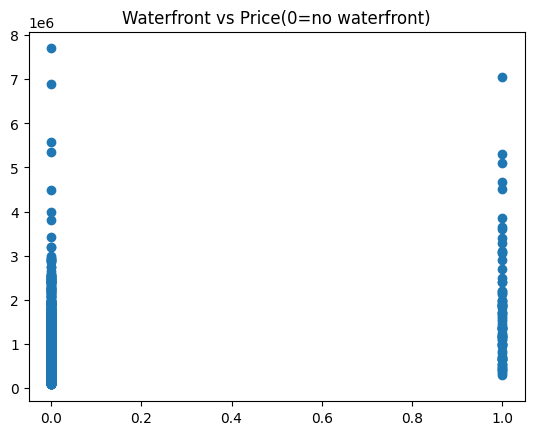

In [14]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price(0=no waterfront)")

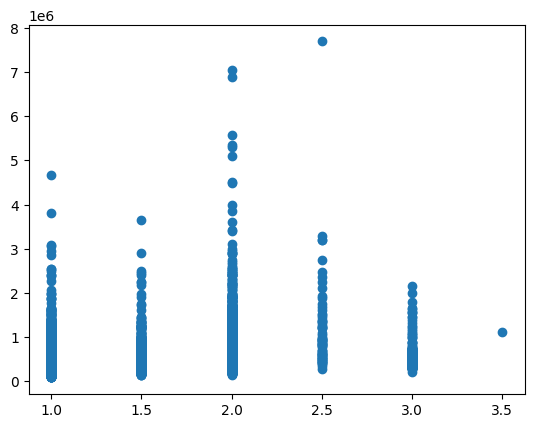

In [15]:
plt.scatter(data.floors,data.price)

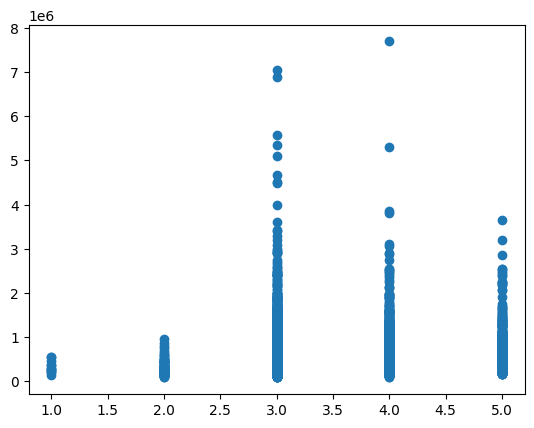

In [16]:
plt.scatter(data.condition,data.price)

Text(0.5, 1.0, 'Which is the pricey locatiin by zipcode')

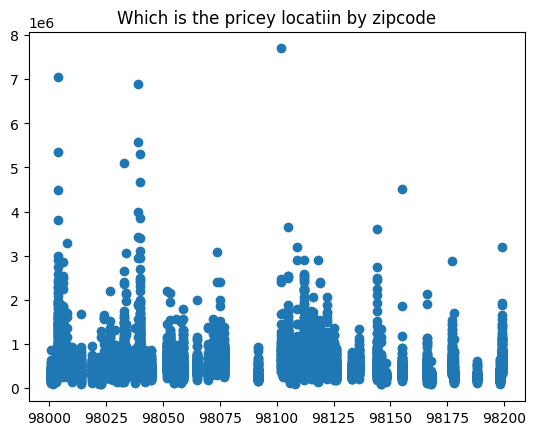

In [17]:
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey locatiin by zipcode")

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg=LinearRegression()

In [21]:
labels=data['price']
conv_dates=[1 if values==2014 else 0 for values in data.date]
data['date']=conv_dates
train1=data.drop(['id','price'],axis=1)

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
x_train,x_test,y_train,y_test=train_test_split(train1,labels,test_size=0.10,random_state=2)

In [26]:
reg.fit(x_train,y_train)

In [28]:
reg.score(x_test,y_test)